In [12]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from imageio import imread

In [13]:
train_data_folder = "./images_background/"
test_data_folder = "./images_evaluation/"
save_path = "./data/"

(105, 105, 3)
(105, 105)


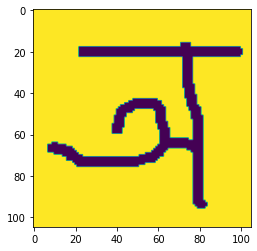

In [17]:
test_path = "./images_background/Bengali/character01/0132_01.png"
image1 = cv2.imread(test_path)
plt.imshow(image1)
print(image1.shape)
image2 = imread(test_path)
plt.imshow(image2)
print(image2.shape)

In [ ]:
def loadimgs(path,n = 0):
    X = []
    y = []
    lang_dict = {}  #语言在字母表的位置
    cat_dict = {}   #（字母表，字符）
    curr_y = n      #统计个数
    
    for alphabet in os.listdir(path):
        print("loading alphabet: "+alphabet)
        lang_dict[alphabet] = [curr_y,None]
        alphabet_path = os.path.join(path,alphabet)
        
        #读取字母表中的字符
        for letter in os.listdir(alphabet_path):
            cat_dict[curr_y] = (alphabet,letter)
            #实际符号的数据
            category_images = []
            letter_path = os.path.join(alphabet_path,letter)
            
            for filename in os.listdir(letter_path):
                image_path = os.path.join(letter_path,filename)
                image = cv2.imread(image_path)
                category_images.append(image)
                y.append(curr_y)
                try:
                    X.append(np.stack(category_images))
                except ValueError as e:
                    print(e)
                    print("error - category_images:", category_images)
                curr_y += 1
                lang_dict[alphabet][1] = curr_y - 1
    y = np.vstack(y)
    X = np.stack(X)
    return X,y,lang_dict

In [ ]:
X,y,c = loadimg(train_data_folder)
X.